<a href="https://colab.research.google.com/github/ishandahal/Fun_Projects/blob/master/Mnist_full_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Attempting to create a minist digit classifier.

In [ ]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 358kB 4.5MB/s 


In [ ]:
import fastai
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

In [ ]:
#Checking the contents of the dataset
path.ls()

(#2) [Path('training'),Path('testing')]

###Lesson learned object needs to be modified by .ls() for it to be iterable.


In [ ]:
#Looking at the training set only
train_set = (path / 'training').ls().sorted()
train_set

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [ ]:
train_set[0]

Path('training/0')

In [ ]:
#Let's see what the digits look like. Just the 9s.
sample_nines = train_set[9].ls()
sample_nines

(#5949) [Path('training/9/17107.png'),Path('training/9/41306.png'),Path('training/9/52315.png'),Path('training/9/46435.png'),Path('training/9/20333.png'),Path('training/9/31659.png'),Path('training/9/25828.png'),Path('training/9/27128.png'),Path('training/9/43324.png'),Path('training/9/3913.png')...]

In [ ]:
view_nine = Image.open(sample_nines[9])
view_nine

###Converting images into tensors and stacking them together in the training set.

In [ ]:
zeros = train_set[0].ls().sorted()
ones = train_set[1].ls().sorted()
zeros = train_set

In [ ]:
##Function to create a dictionary of all the images into their respective named containers
def dict_for_digits(path):
    str_ = (0,1,2,3,4,5,6,7,8,9)
    new_dict = {str_[idx]: letters.ls() for idx, letters in enumerate(path)}
    return new_dict


In [ ]:
##Going to get the test set ready while here
test_set = path / 'testing'
test_set = test_set.ls().sorted()
test_set

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [ ]:
digit_dict_train = dict_for_digits(train_set)
digit_dict_test = dict_for_digits(test_set)

In [ ]:
digit_dict_train

{0: (#5923) [Path('training/0/52804.png'),Path('training/0/27283.png'),Path('training/0/9966.png'),Path('training/0/33214.png'),Path('training/0/19303.png'),Path('training/0/4488.png'),Path('training/0/43613.png'),Path('training/0/4926.png'),Path('training/0/5844.png'),Path('training/0/41358.png')...],
 1: (#6742) [Path('training/1/49392.png'),Path('training/1/26745.png'),Path('training/1/8648.png'),Path('training/1/53206.png'),Path('training/1/27789.png'),Path('training/1/49308.png'),Path('training/1/18852.png'),Path('training/1/5966.png'),Path('training/1/27657.png'),Path('training/1/8625.png')...],
 2: (#5958) [Path('training/2/1662.png'),Path('training/2/21623.png'),Path('training/2/472.png'),Path('training/2/55508.png'),Path('training/2/47369.png'),Path('training/2/5318.png'),Path('training/2/54052.png'),Path('training/2/44934.png'),Path('training/2/5129.png'),Path('training/2/48986.png')...],
 3: (#6131) [Path('training/3/40940.png'),Path('training/3/55876.png'),Path('training/3/

In [ ]:
#Testing tensor conversion before creating a function
tensor(Image.open(digit_dict_train[0][0]))
tnsr_0 = torch.stack([tensor(Image.open(o)) for o in digit_dict_train[0]])

In [ ]:
tnsr_0.shape

torch.Size([5923, 28, 28])

In [ ]:
##Converting images into tensors and stacking
## Function that converts one folder of images to tensors

def img_to_tnsr(folder):
    """Converts iterable images into tensors and stacks them"""
    return torch.stack([tensor(Image.open(i)) for i in folder]).float() / 255.0

def agg_tnsr_imgs(dicts):
    """Takes in dictionary of images and converts to stacked tensors"""
    tnsr_folder = [img_to_tnsr(dicts[key]) for key, value in dicts.items()]
    agged_tnsrs = torch.cat(tnsr_folder[:])
    return agged_tnsrs


In [ ]:
### Creating one hot encoded vectors (labels) for the dataset
## Using the dictionary as a guide
def one_hot_label(rows, cols, index):

    shape_of_vector = torch.zeros([rows,cols])
    shape_of_vector[:, index] = 1
    return shape_of_vector

def label_all(dicts):
    labels = [one_hot_label(len(values), len(dicts.keys()), keys) for keys,values in dicts.items()]
    labels = torch.cat(labels[:])
    return labels


In [ ]:
#Training and test set with all the images converted to tensor, stacked and concatenated
train_x = agg_tnsr_imgs(digit_dict_train)
test_x = agg_tnsr_imgs(digit_dict_test)

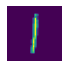

In [ ]:
show_image(test_x[1500]);

In [ ]:
##Checking the data type 
train_x.dtype, test_x.dtype

(torch.float32, torch.float32)

In [ ]:
train_x.shape, test_x.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
##Creating training and testing labels
train_y = label_all(digit_dict_train)
test_y = label_all(digit_dict_test)

In [ ]:
train_y.shape, test_y.shape

(torch.Size([60000, 10]), torch.Size([10000, 10]))

In [ ]:
train_x.shape, test_x.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
##Flattening the inputs for test and training set
## Adding an extra rank for the linear model computation
train_x = train_x.view(-1, 28*28)
test_x = test_x.view(-1, 28*28)

In [ ]:
# train_x[0].shape, test_x[0].shape
train_x.shape, test_x.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [ ]:
## Collating training inputs and labels
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([10]))

In [ ]:
#Preparing the Test set
dset_test = list(zip(test_x, test_y))
x, y = dset_test[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([10]))

In [ ]:
## Creating dataloader with the training set and test set
dls = DataLoader(dset, bs=64, shuffle=True)
dls_test = DataLoader(dset_test, bs=64)

In [ ]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 784]), torch.Size([64, 10]))

In [ ]:
## Initializing parameters(weights and biases)
def init_params():
    return torch.rand(28*28, 10).requires_grad_() , torch.rand(10).requires_grad_()

#Simple one layer Linear Model 
def linear1(input):
    #input dimension n,28*28
    #weight dimension 28*28, 10
    #bias dimension 10, 1
    #output dimension n,10
    return input @ weights + bias

In [ ]:
## Loss function 
## Going to need cross entropy loss function
## Had a tough time implementing softmax on torch. Kept running into numerical
## Solution is to remove subtract max from numerator
# instability on the first row which threw made loss function nan. 
def soft_max(preds):
    "Takes predictions from the final layer and return probabilities"
    # return torch.exp(preds) / torch.sum(torch.exp(preds), dim=1).view(-1,1)
    return preds.softmax(dim=1)
    # return exp(preds) / exp(preds).sum(dim=0, keepdim=True) #Applying softmax to get probabilities


def neg_log_like(preds, targs):
    "Takes the probabilities from softmax and returns average loss"
    return -(preds.log() * targs).sum() / len(preds)


def cross_entropy(preds, targs):
    "Putting softmax and neg-log together"
    soft = soft_max(preds)
    return neg_log_like(soft, targs)

In [ ]:
## Performing a simple forward pass.
images, label = dls.one_batch()
weights, bias = init_params()
preds = linear1(images)
loss = cross_entropy(preds, label)
loss

tensor(4.7432, grad_fn=<DivBackward0>)

In [ ]:
loss.backward()

In [ ]:
lr = 1e-3
weights.data -= lr * weights.grad
bias.data -= lr * bias.grad

In [ ]:
weights.grad = None
bias.grad = None

In [ ]:
## Checking to see if the loss decreased.
preds = linear1(images)
loss = cross_entropy(preds, label)
loss

tensor(4.7385, grad_fn=<DivBackward0>)

In [ ]:
## Calculating the gradient, taking the step and zeroizing the gradient

def calc_grad_n_step(loss_, lr):
    loss_.backward()
    weights.data -= lr * weights.grad
    bias.data -= lr * bias.grad
    weights.grad, bias.grad = None, None

def train_batch(lr):
    for x,y in dls:
        preds = linear1(x)
        loss = cross_entropy(preds, y)
        calc_grad_n_step(loss, lr)

In [ ]:
## Calculating accuracy
def acc_of_data(dls, model):
    x, y = dls 
    preds = model(x)
    probs = soft_max(preds)
    return (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).float().mean()


def val_epoch(dls):
    stacked_acc = [acc_of_data(batch, linear1) for batch in dls]
    return torch.stack(stacked_acc).mean()

## generic accuracy calculator from predictions and targets
def cal_accuracy(preds, y):
    probs = soft_max(preds)
    return (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).float().mean()

In [ ]:
### Alternate accuracy metric
def acc_of_data_(preds, targs):
    probs = soft_max(preds)
    return (torch.argmax(probs, dim=1) == torch.argmax(targs, dim=1)).float().mean()


def val_epoch_(dls):
    stacked_acc = [acc_of_data(linear1(x), y) for x,y in dls]
    return torch.stack(stacked_acc).mean()


In [ ]:
val_epoch(dls_test)

tensor(0.0725)

In [ ]:
for _ in range(40):
    train_batch(lr=lr)
    print(f'{val_epoch(dls_test):.4f}', end=' ')

0.2052 0.3306 0.4396 0.5140 0.5749 0.6173 0.6455 0.6730 0.6957 0.7143 0.7285 0.7433 0.7531 0.7629 0.7708 0.7763 0.7835 0.7910 0.7971 0.8022 0.8050 0.8079 0.8108 0.8151 0.8187 0.8208 0.8236 0.8268 0.8302 0.8326 0.8347 0.8377 0.8405 0.8420 0.8439 0.8455 0.8468 0.8481 0.8501 0.8507 

In [ ]:
## Creating an optimizer
class Optim():
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr
    
    def step(self):
        for p in self.params:
            p.data -= p.grad * self.lr
    
    def zero_grad(self):
        for p in self.params:
            p.grad = None

def calc_grad(x, y, model):
        preds = model(x)
        loss = cross_entropy(preds, y)
        loss.backward()

In [ ]:
weights, bias = init_params()
optim = Optim((weights, bias), lr)

In [ ]:
### New modified training epoch func
def train_epoch(model, optim):
    for images, labels in dls:
        calc_grad(images, labels, linear1)
        optim.step()
        optim.zero_grad

In [ ]:
## Not sure what the issue is here
for _ in range(10):
        train_epoch(linear1, optim)
        print(f'{val_epoch(dls_test):.4f}', end=' ')

0.0975 0.0975 0.0975 0.0975 0.0975 0.0975 0.0975 0.0975 0.0975 0.0975 

In [ ]:
##Replacing optimizer with Torch's SGD

In [ ]:
linear = nn.Linear(28*28, 10)
optim = SGD(linear.parameters(), lr)

In [ ]:
dls = DataLoaders(dls, dls_test)

In [ ]:
learn = Learner(dls, linear, loss_func=cross_entropy, opt_func=SGD,
                metrics=acc_of_data_)

In [ ]:
learn.fit(10, lr)

epoch,train_loss,valid_loss,acc_of_data_,time
0,1.606853,1.559366,0.758500,00:02
1,1.240666,1.199123,0.811100,00:02
2,1.034508,1.000841,0.830500,00:02
3,0.919014,0.878384,0.840200,00:02
4,0.818620,0.795141,0.848400,00:02
5,0.758397,0.734892,0.855200,00:02
6,0.713725,0.689127,0.859500,00:02
7,0.668757,0.653055,0.864200,00:02
8,0.652285,0.623732,0.867300,00:02
9,0.628114,0.599347,0.869100,00:02


##With the linear model we are at accuracy of ~87% while training for 10 epochs.

### Non let's add some non linearity and See where things go. 

In [ ]:
###Adding a non linearity

model = nn.Sequential(
    nn.Linear(28*28,128),
    nn.ReLU(),
    nn.Linear(128,10))

In [ ]:
learn = Learner(dls, model, opt_func=SGD,
                loss_func=cross_entropy, metrics=acc_of_data_)

In [ ]:
learn.fit(40, 1e-2)

epoch,train_loss,valid_loss,acc_of_data_,time
0,0.641221,0.585679,0.863900,00:03
1,0.420750,0.405148,0.892900,00:03
2,0.373352,0.352854,0.900100,00:03
3,0.334767,0.324477,0.909200,00:03
4,0.312967,0.307646,0.913500,00:03
5,0.319067,0.296334,0.917100,00:03
6,0.314760,0.283146,0.920700,00:03
7,0.277917,0.272418,0.922700,00:03
8,0.279553,0.262221,0.925800,00:03
9,0.259488,0.253598,0.928000,00:03


### Not too bad Adding one layer of non-linearity and also training for a 
###substantial epochs got us to ~97%. 
####Even at 10 epochs it beat the strictly linear model. 

In [ ]:
##Using slightly more involved network ResNet with 18 layers:
dls = ImageDataLoaders.from_folder(path, train="training", valid="testing")

learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit(5, lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.124324,0.214103,0.943700,01:05
1,0.083419,0.065589,0.980300,01:04
2,0.062813,0.035140,0.989100,01:05
3,0.046921,0.034787,0.989000,01:05
4,0.037086,0.032392,0.990500,01:05


###This is the performance for resnet. Quite impressive!!

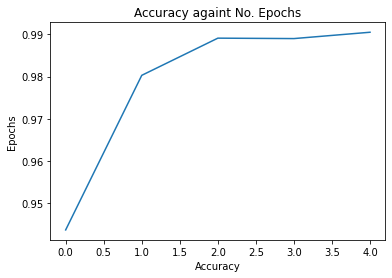

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2))
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.title("Accuracy againt No. Epochs");

###Below codes are debugging efforts. 

In [ ]:
weights, bias = init_params()
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [ ]:
## Testing with 5 samples from the test set
lr = 0.01
x = train_x[0:5]
y = train_y[0:5]
dls_trial = (x,y)
preds = linear1(x)
preds[0]

tensor([107.6494, 104.4783, 113.6216, 115.1003, 107.9588, 118.6902, 109.3886,
        114.7457, 104.3604, 116.9249], grad_fn=<SelectBackward>)

In [ ]:
loss = cross_entropy(preds, y)
loss

tensor(8.5417, grad_fn=<DivBackward0>)

In [ ]:
### Calculating the gradient, adjusting the weights and zeroising the gradients
calc_grad_n_step(loss, lr)

In [ ]:
## Running the cycle again to see if the loss decreases. 
preds = linear1(x)
loss = cross_entropy(preds, y)
loss

tensor(7.3643, grad_fn=<DivBackward0>)

##Phew! The loss is lower than before. 

In [ ]:
## Let's train for 10 epochs and see if the loss keeps decreasing steadily
for i in range(10):
    lr = 0.01
    weights, bias = init_params()
    preds = linear1(x)
    loss = cross_entropy(preds, y)
    calc_grad_n_step(loss, lr)
    print(loss)

tensor(11.2195, grad_fn=<DivBackward0>)
tensor(5.5926, grad_fn=<DivBackward0>)
tensor(5.2006, grad_fn=<DivBackward0>)
tensor(4.9472, grad_fn=<DivBackward0>)
tensor(1.9228, grad_fn=<DivBackward0>)
tensor(6.9587, grad_fn=<DivBackward0>)
tensor(4.0982, grad_fn=<DivBackward0>)
tensor(2.5247, grad_fn=<DivBackward0>)
tensor(6.0229, grad_fn=<DivBackward0>)
tensor(2.3157, grad_fn=<DivBackward0>)


In [ ]:
## Creating a function which trains for a given number of times

def train_epoch(dls, model, epoch=10, lr=0.1, *args, **kwargs):
    for i in range(epoch):
        x,y = dls
        weights, bias = init_params()
        preds = model(x)
        loss = cross_entropy(preds, y)
        calc_grad_n_step(loss, lr)
        if i % 2 == 0: print(loss, end=' ')

In [ ]:
## Function for training multiple epochs appears to work.
train_epoch(dls_trial, linear1)

tensor(1.8981, grad_fn=<DivBackward0>) tensor(0.0276, grad_fn=<DivBackward0>) tensor(0.0148, grad_fn=<DivBackward0>) tensor(0.0105, grad_fn=<DivBackward0>) tensor(0.0083, grad_fn=<DivBackward0>) 

In [ ]:
### Accuracy metric
preds = linear1(x)
probs = soft_max(preds)
torch.argmax(probs, dim=1)
acc = (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).sum()
percent_acc = torch.true_divide(acc, preds.shape[0]) ## Here the accuracy is 100% but that is only with a small sample and trained after 10 epochs
percent_acc

tensor(1.)

In [ ]:
##Checking the accuracy metric for sanity check with random weights. 
preds = linear1(x)
probs = soft_max(preds)
torch.argmax(probs, dim=1)
acc = (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).sum()
percent_acc = torch.true_divide(acc, preds.shape[0])
percent_acc ## Well out target is letter zeros and the accuracy metric is 0% random initialization. Let's see how it does forward.

tensor(1.)

In [ ]:
## Function to check accuracy metric
def acc_of_data(dls, model):
    x, y = dls 
    preds = model(x)
    probs = soft_max(preds)
    acc = (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).sum()
    percent_acc = torch.true_divide(acc, preds.shape[0])
    print(percent_acc)

In [ ]:
acc_of_data(dls_trial, linear1)

tensor(1.)


##Need to investigate why the loss is not changing below. 

In [ ]:
## Choosing a random set of data to check to see if the model works
## Ran into issues with random indicies, Not sure why. 
idxs = torch.randint(0, 60000, (100,1))
dummy_train, labels = train_x[idxs], train_y[idxs] ## This is the training set
train_epoch((x,y), linear1, epoch=20, lr=0.001)

tensor(0.0069, grad_fn=<DivBackward0>) tensor(0.0069, grad_fn=<DivBackward0>) tensor(0.0069, grad_fn=<DivBackward0>) tensor(0.0069, grad_fn=<DivBackward0>) tensor(0.0068, grad_fn=<DivBackward0>) tensor(0.0068, grad_fn=<DivBackward0>) tensor(0.0068, grad_fn=<DivBackward0>) tensor(0.0068, grad_fn=<DivBackward0>) tensor(0.0068, grad_fn=<DivBackward0>) tensor(0.0068, grad_fn=<DivBackward0>) 

In [ ]:
## Seems to work fine here
x_ = train_x[500:1000]
y_ = train_y[500:1000]
dls_trial_ = (x_,y_)
train_epoch(dls_trial_, linear1, epoch=20)

tensor(0.0315, grad_fn=<DivBackward0>) tensor(0.0283, grad_fn=<DivBackward0>) tensor(0.0256, grad_fn=<DivBackward0>) tensor(0.0233, grad_fn=<DivBackward0>) tensor(0.0214, grad_fn=<DivBackward0>) tensor(0.0198, grad_fn=<DivBackward0>) tensor(0.0183, grad_fn=<DivBackward0>) tensor(0.0171, grad_fn=<DivBackward0>) tensor(0.0160, grad_fn=<DivBackward0>) tensor(0.0151, grad_fn=<DivBackward0>) 

In [ ]:
### Debugging step: Writing a function that train one batch and prints the loss

def train_once(x,y):
    weights, bias = init_params()
    for _ in range(5):
        preds = linear1(x)
        loss = cross_entropy(preds, y)
        calc_grad_n_step(loss, lr)
        print(loss)
train_once(train_x[:5],train_y[:5])

tensor(2.7491e-05, grad_fn=<DivBackward0>)
tensor(2.7491e-05, grad_fn=<DivBackward0>)
tensor(2.7491e-05, grad_fn=<DivBackward0>)
tensor(2.7491e-05, grad_fn=<DivBackward0>)
tensor(2.7491e-05, grad_fn=<DivBackward0>)


In [ ]:
## Same function as above for training but for batches.


# def train_batch(dls, model, lr=0.1, *args, **kwargs):
#     for x,y in dls:
#         weights, bias = init_params()
#         preds = model(x)
#         loss = cross_entropy(preds, y)
#         calc_grad_n_step(loss, lr)
#         print(loss)

# def train_(epoch, lr):
#     for _ in range(epoch):
#         train_batch(dls, linear1, lr=lr)
#         print(f'Validation accuracy per epoch: {val_epoch(dls_test)}')



# def train_batch(dls, model, epoch=10, lr=0.1, print_loss=False, *args, **kwargs):
#         for i in range(epoch):
#             for batch in dls:
#                 x, y = batch
#                 lr = lr
#                 weights, bias = init_params()
#                 preds = model(x)
#                 loss = cross_entropy(preds, y)
#                 calc_grad_n_step(loss, lr)
#                 if print_loss:
#                     print(loss, end=' ')

## Function for validating the training. Let's see if it was worth it.

# def acc_of_data(dls, model):
#     x, y = dls 
#     preds = model(x)
#     probs = soft_max(preds)
#     return (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).float().mean()


# def val_epoch(dls):
#     stacked_acc = [acc_of_data(batch, linear1) for batch in dls]
#     return torch.stack(stacked_acc).mean()


# def val_acc(dls, model):
#     cum = 0
#     counter = 0
#     percent_final = torch.true_divide(cum, counter)
#     for batch in dls:
#         x, y = batch 
#         preds = model(x)
#         probs = soft_max(preds)
#         acc = (torch.argmax(probs, dim=1) == torch.argmax(y, dim=1)).sum()
#         percent_acc = torch.true_divide(acc, preds.shape[0])
#         print(percent_acc)
#         cum += percent_acc
#         counter += 1

#     print(f"Validation accuracy: {percent_final}")
#     print(cum, counter)

In [ ]:
train_batch(dls, linear1, lr=0.01)